In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('thedataset.csv')

In [4]:
# Separate the features and target variable
X = df.drop(columns=['classification', 'hash'])
y = df['classification']

# Split the dataset into training (70%) and testing (30%) sets, ensuring a balanced distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [5]:
# Basic statistics for the numerical features in the training set
train_stats = X_train.describe()

# Correlation matrix for the features
corr_matrix = X_train.corr()

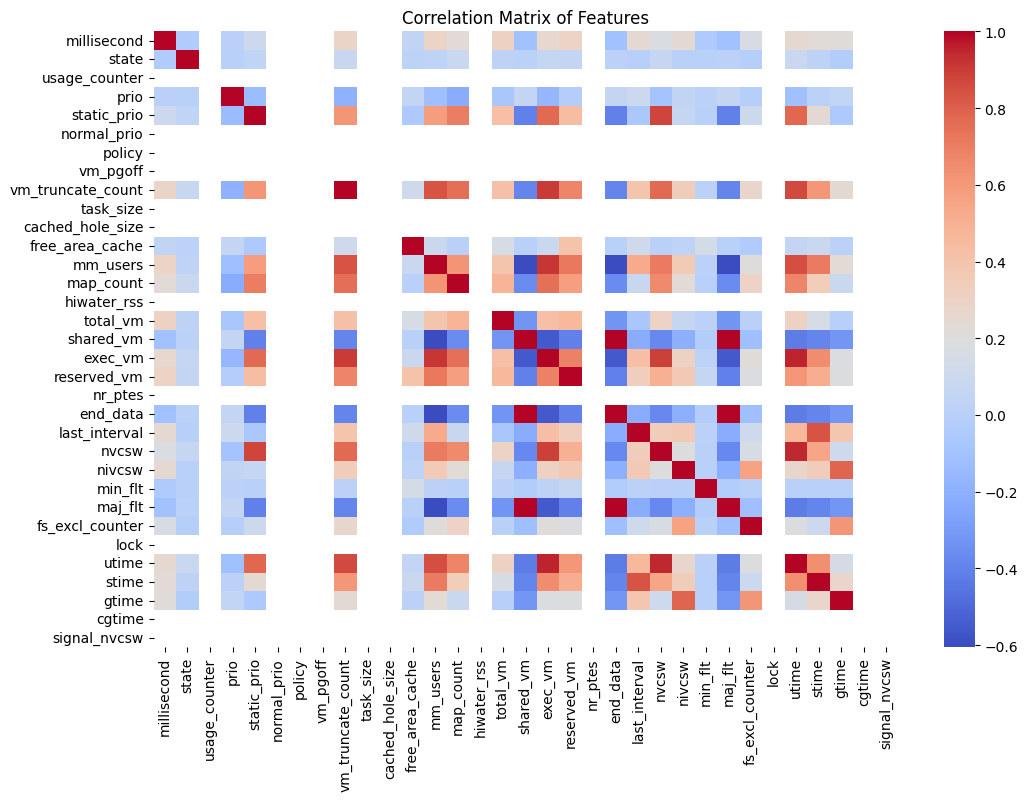

In [6]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


In [20]:
# Initialize the classifiers
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
lr_clf = LogisticRegression(max_iter=2000, random_state=42)

In [21]:
# Train the classifiers
rf_clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [22]:
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=0.1, stratify=y_train, random_state=42)
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_sub, y_train_sub)


SVC(random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
lr_clf_scaled = LogisticRegression(max_iter=500, random_state=42)
lr_clf_scaled.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500, random_state=42)

In [26]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


In [27]:
y_pred_svm = svm_clf.predict(X_test)
y_pred_lr_scaled = lr_clf_scaled.predict(X_test_scaled)

In [28]:
# Generate confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_lr_scaled = confusion_matrix(y_test, y_pred_lr_scaled)

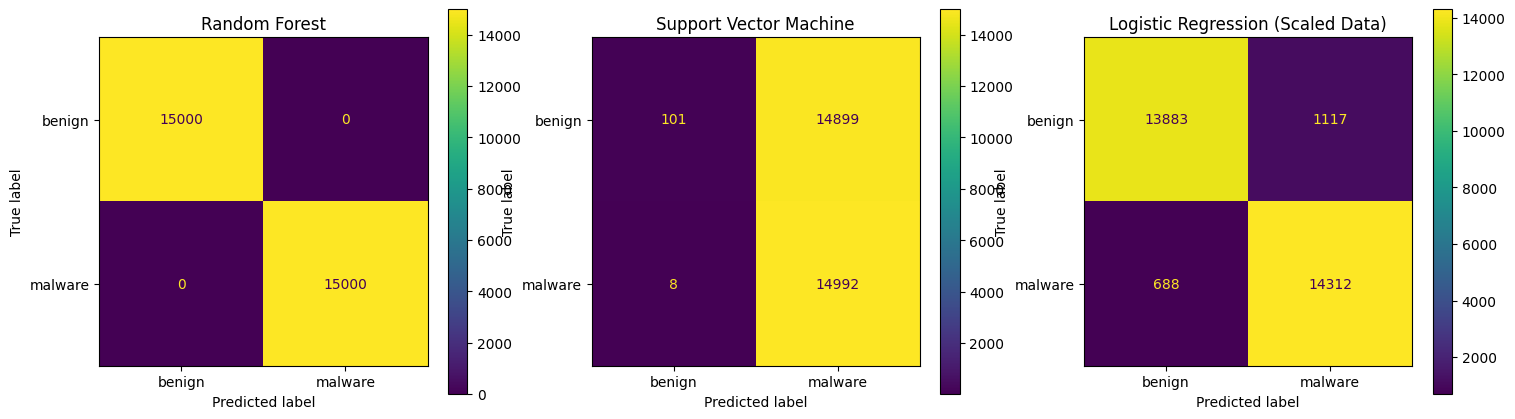

In [29]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ConfusionMatrixDisplay(cm_rf, display_labels=rf_clf.classes_).plot(ax=axes[0])
axes[0].set_title("Random Forest")

ConfusionMatrixDisplay(cm_svm, display_labels=svm_clf.classes_).plot(ax=axes[1])
axes[1].set_title("Support Vector Machine")

ConfusionMatrixDisplay(cm_lr_scaled, display_labels=lr_clf_scaled.classes_).plot(ax=axes[2])
axes[2].set_title("Logistic Regression (Scaled Data)")

plt.show()

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, accuracy_score

# Calculate and print accuracy for each classifier
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_lr = accuracy_score(y_test, y_pred_lr_scaled)

print(f"Random Forest Accuracy: {acc_rf:.2f}")
print(f"SVM Accuracy: {acc_svm:.2f}")
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")


Random Forest Accuracy: 1.00
SVM Accuracy: 0.50
Logistic Regression Accuracy: 0.94


In [32]:
# Generate classification reports
report_rf = classification_report(y_test, y_pred_rf)
report_svm = classification_report(y_test, y_pred_svm)
report_lr = classification_report(y_test, y_pred_lr_scaled)

print("\nRandom Forest Classification Report:\n", report_rf)
print("SVM Classification Report:\n", report_svm)
print("Logistic Regression Classification Report:\n", report_lr)


Random Forest Classification Report:
               precision    recall  f1-score   support

      benign       1.00      1.00      1.00     15000
     malware       1.00      1.00      1.00     15000

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

SVM Classification Report:
               precision    recall  f1-score   support

      benign       0.93      0.01      0.01     15000
     malware       0.50      1.00      0.67     15000

    accuracy                           0.50     30000
   macro avg       0.71      0.50      0.34     30000
weighted avg       0.71      0.50      0.34     30000

Logistic Regression Classification Report:
               precision    recall  f1-score   support

      benign       0.95      0.93      0.94     15000
     malware       0.93      0.95      0.94     15000

    accuracy                           0.94     30000
   macro avg     

In [33]:
# ROC and AUC
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
y_prob_svm = svm_clf.decision_function(X_test)
y_prob_lr = lr_clf_scaled.predict_proba(X_test_scaled)[:, 1]

auc_rf = roc_auc_score(y_test.map({'benign': 0, 'malware': 1}), y_prob_rf)
auc_svm = roc_auc_score(y_test.map({'benign': 0, 'malware': 1}), y_prob_svm)
auc_lr = roc_auc_score(y_test.map({'benign': 0, 'malware': 1}), y_prob_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test.map({'benign': 0, 'malware': 1}), y_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test.map({'benign': 0, 'malware': 1}), y_prob_svm)
fpr_lr, tpr_lr, _ = roc_curve(y_test.map({'benign': 0, 'malware': 1}), y_prob_lr)

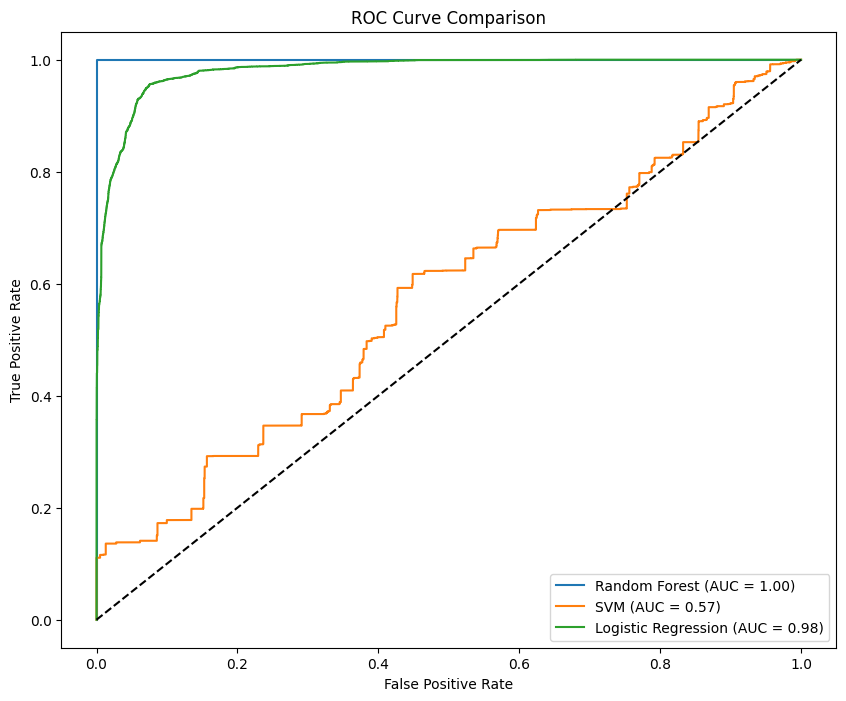

In [34]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()
